In [1]:
#importing libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [140]:
imag_path='C:/Users/Smart Computers/Desktop/before.png'

In [141]:
before_image = Image.open(imag_path)


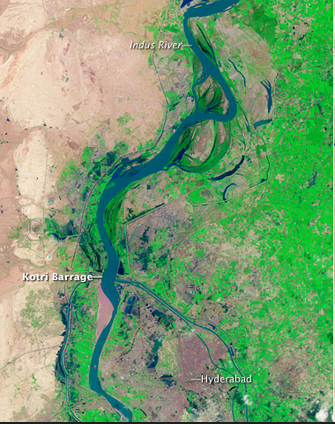

In [142]:
before_image

In [143]:
image = Image.open(imag_path).convert("L")  #showing image and converting it to grey scale

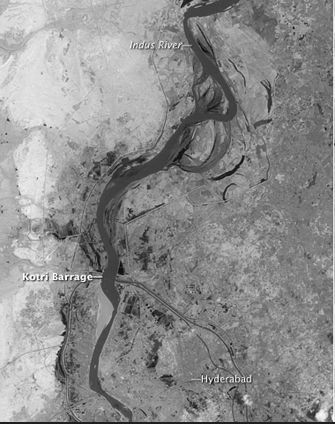

In [144]:
image

In [145]:
#Convert PIL image to nmpy array
image_np = np.array(image)

In [146]:
 #Reshape the image to a 1D array for K-means clustering
image_1d = image_np.reshape(-1, 1)

In [147]:
image_np.shape, image_1d.shape

((424, 335), (142040, 1))

In [148]:
#K-means clustering
n=4
kmeans = KMeans(n_clusters=n)
cluster_assignments = kmeans.fit_predict(image_1d)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
cluster_assignments.shape

(142040,)

In [150]:
# Reshape the cluster assignments back to the image shape
clustered_image = cluster_assignments.reshape(image_np.shape)

In [151]:
clustered_image.shape

(424, 335)

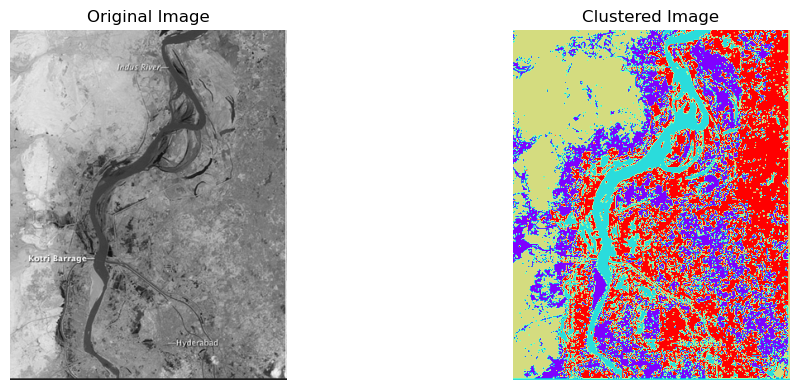

In [152]:
#plotting
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(clustered_image, cmap='rainbow')
plt.title('Clustered Image')
plt.axis('off')
plt.tight_layout()
plt.show()

**Mask of Before flood Image**

In [153]:
masks = []
for cluster_id in range(n):
    cluster_mask = (cluster_assignments == cluster_id).reshape(image_np.shape)
    masks.append(cluster_mask)

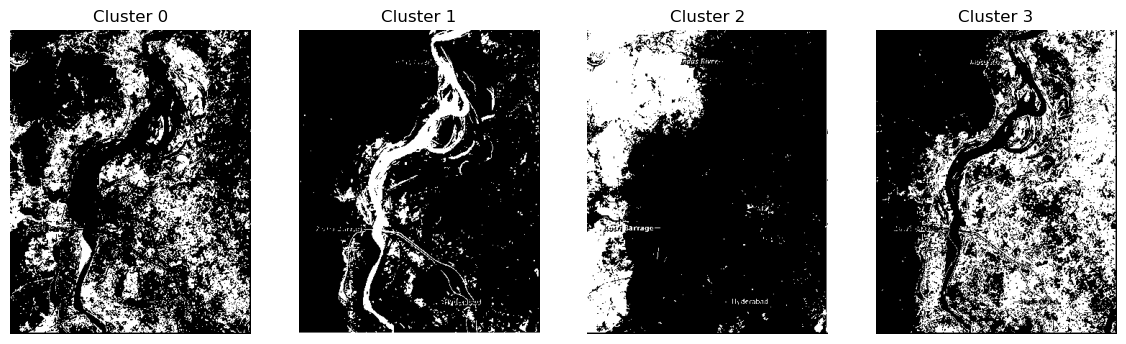

In [154]:
#plotting
plt.figure(figsize=(18, 12))
for i in range(n):
 plt.subplot(1, n + 1, i + 2)
 plt.imshow(masks[i], cmap='gray')
 plt.title(f'Cluster {i}')
 plt.axis('off')

In [2]:
plt.imshow(image_np*masks[1],cmap='gray')

NameError: name 'image_np' is not defined

**After Flood Image**

In [156]:
after_imag_path='C:/Users/Smart Computers/Desktop/after.png'

In [157]:
aft_image = Image.open(after_imag_path)

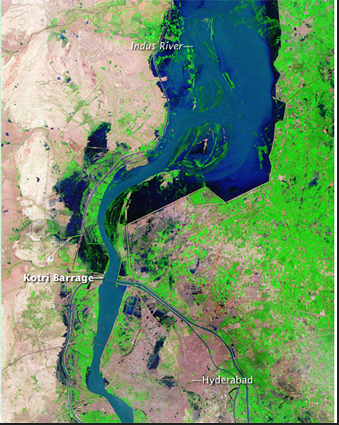

In [158]:
aft_image

In [159]:
after_image = Image.open(after_imag_path).convert("L")  #showing image and converting it to grey scale

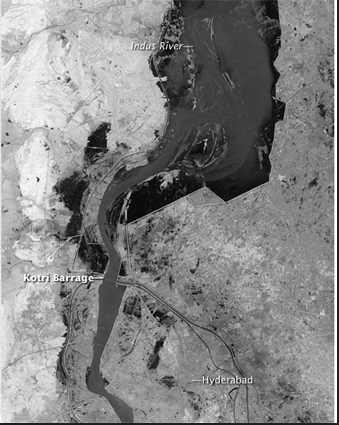

In [160]:
after_image

In [161]:
after_image_np = np.array(after_image)

In [162]:
 #Reshape the image to a 1D array for K-means clustering
after_image_1d = after_image_np.reshape(-1, 1)

In [163]:
after_image_np.shape, after_image_1d.shape

((425, 339), (144075, 1))

In [164]:
#K-means clustering
an=4
akmeans = KMeans(n_clusters=an)
acluster_assignments = akmeans.fit_predict(after_image_1d)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [165]:
acluster_assignments.shape

(144075,)

In [166]:
# Reshape the cluster assignments back to the image shape
aclustered_image = acluster_assignments.reshape(after_image_np.shape)

In [167]:
aclustered_image.shape

(425, 339)

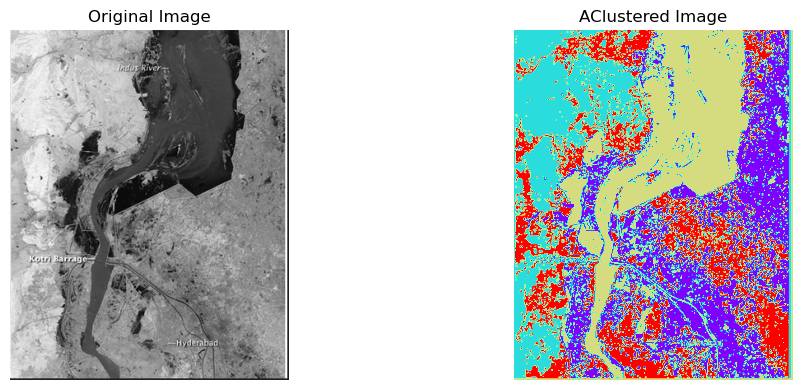

In [168]:
#plotting
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(after_image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(aclustered_image, cmap='rainbow')
plt.title('AClustered Image')
plt.axis('off')
plt.tight_layout()
plt.show()

**Mask of After Flood Images**

In [169]:
amasks = []
for acluster_id in range(an):
    acluster_mask = (acluster_assignments == acluster_id).reshape(after_image_np.shape)
    amasks.append(acluster_mask)

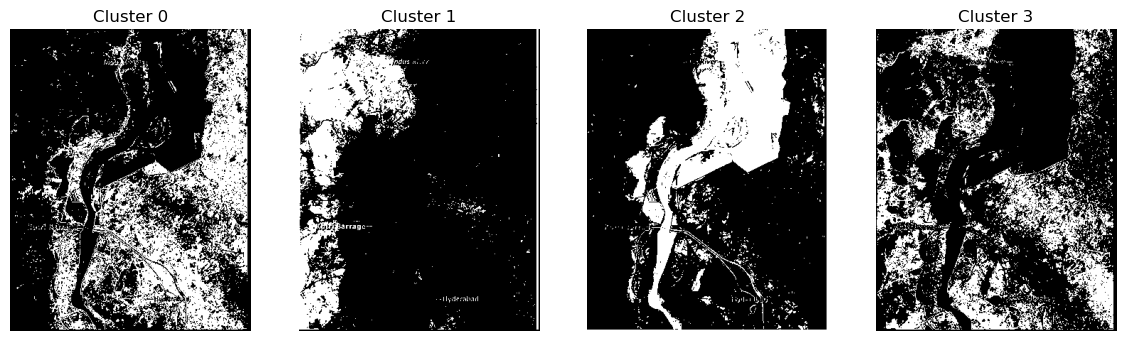

In [170]:
#plotting
plt.figure(figsize=(18, 12))
for i in range(n):
 plt.subplot(1, n + 1, i + 2)
 plt.imshow(amasks[i], cmap='gray')
 plt.title(f'Cluster {i}')
 plt.axis('off')

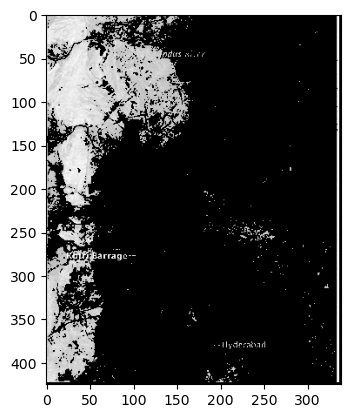

In [171]:
plt.imshow(after_image_np*amasks[1],cmap='gray')

**Original Image**

In [172]:
flood_imag_path='C:/Users/Smart Computers/Desktop/flood_image.png'

In [173]:
flood_image = Image.open(flood_imag_path)

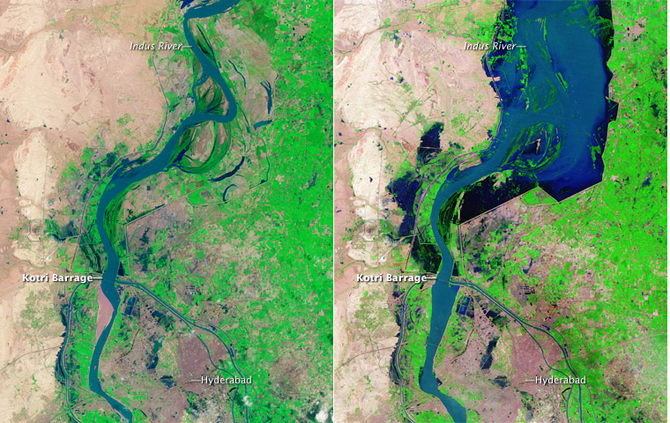

In [174]:
flood_image

**Masks for water images**

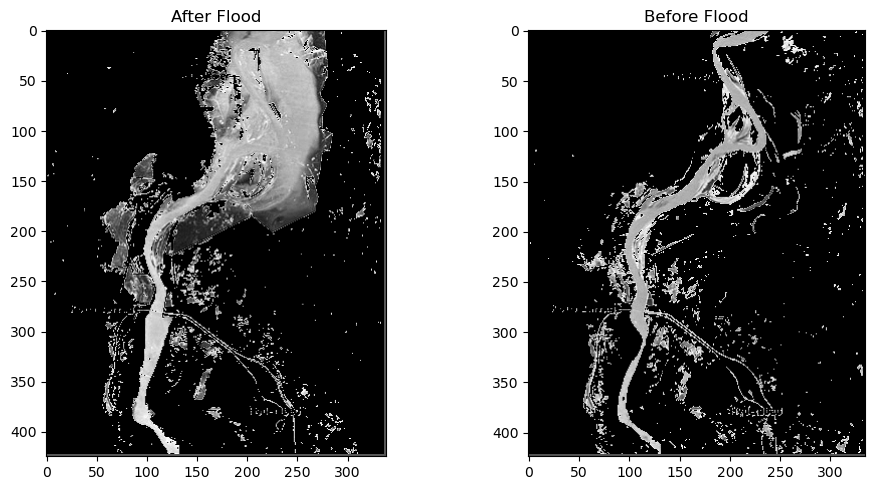

In [184]:
import matplotlib.pyplot as plt

# Assuming you have loaded your images and masks as after_image_np, amasks, image_np, and masks

# Create a 1x2 grid of subplots
plt.figure(figsize=(10, 5))

# Plot the first image with its mask
plt.subplot(1, 2, 1)
plt.imshow(after_image_np * amasks[2], cmap='gray')
plt.title("After Flood")

# Plot the second image with its mask
plt.subplot(1, 2, 2)
plt.imshow(image_np * masks[1], cmap='gray')
plt.title("Before Flood")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [185]:
before_flood_mask = np.array(masks[1])

In [186]:
after_flood_mask = np.array(amasks[2])

In [187]:
before_flood_pixel = np.sum(before_flood_mask == 1)

In [188]:
water_pixels_after_flood = np.sum(after_flood_mask == 1)

In [189]:
difference=water_pixels_after_flood- before_flood_pixel
print ('difference is;',difference)

difference is; 19006


In [197]:
masks

[array([[False, False, False, ..., False, False, False],
        [ True,  True, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 144075,
 array([[False, False, False, ...,  True, False, False],
        [False, False, False, ...,  True, False, False],
        [False, False, False, ...,  True, False, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., F

In [198]:
masks[1]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [199]:
masks[1].shape

(424, 335)

In [201]:
amasks[2]

array([[False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [202]:
amasks[2].shape

(425, 339)

target_image_resized = transform.resize(mask_4th_af, mask_3rd_bf.shape)

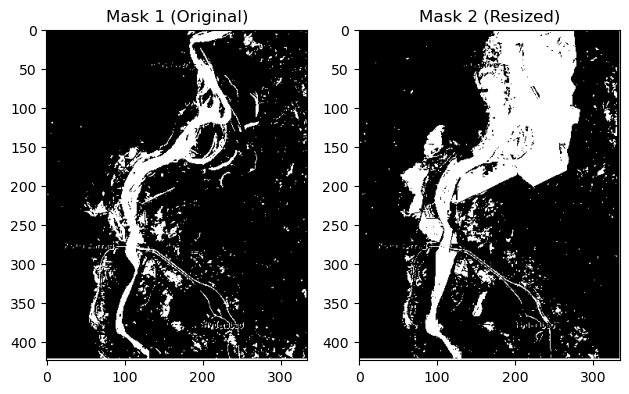

In [203]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming you have loaded your mask images as masks[1] and amasks[2]

# Open the second mask image (amasks[2]) using PIL
image2 = Image.fromarray(amasks[2])

# Resize the second image to match the size of the first image (masks[1])
image2_resized = image2.resize((masks[1].shape[1], masks[1].shape[0]))

# Display the original and resized mask images
plt.subplot(1, 2, 1)
plt.imshow(masks[1], cmap='gray')
plt.title("Mask 1 (Original)")

plt.subplot(1, 2, 2)
plt.imshow(image2_resized, cmap='gray')
plt.title("Mask 2 (Resized)")

plt.tight_layout()
plt.show()


In [205]:
dif=masks[1]^image2_resized

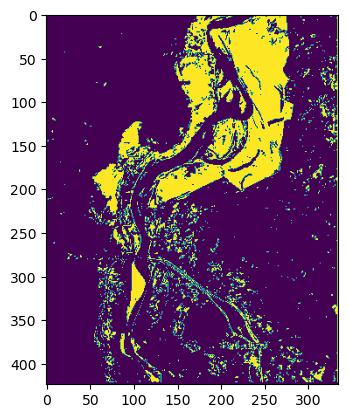

In [208]:
plt.imshow(dif)


In [209]:
plt.imshow(flood_image*dif)

ValueError: operands could not be broadcast together with shapes (423,670,3) (424,335) 